In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

# import data
def get_data(stocks, start, end):
    data = pdr.get_data_yahoo(stocks, start, end)
    data = stockData['Close']
    returns = data.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stocks = ['TSLA', 'AAPL', 'AMZN', 'MSFT', 'FB', 'GOOG']
end = dt.datetime.now()
start = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, start, end)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

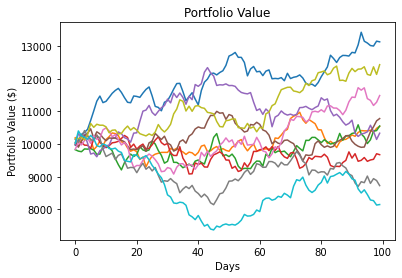

In [13]:
sims = 10 
T = 100 

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Portfolio Value')
plt.show()

In [14]:
avg = portfolio_sims.mean()

In [15]:
avg

10183.643770248247